In [8]:
import torch
import argparse
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


from tqdm.auto import tqdm
import time

from data_setup import train_loader, valid_loader
from utils import save_model, save_plots, train, validate
from model import CNNModel

In [ ]:
# construct the argument parser
parser = argparse.ArgumentParser()
parser.add_argument('-e', '--epochs', type=int, default=20,
    help='number of epochs to train our network for')
args = vars(parser.parse_args())

In [2]:
# Initialize the model
model = CNNModel()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training parameter
num_epochs = 10  # You can adjust this number based on your dataset and training requirements


In [ ]:
# lists to keep track of losses and accuracies
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []

# start the training
for epoch in range(num_epochs):
    print(f"[INFO]: Epoch {epoch+1} of {num_epochs}")
    train_epoch_loss, train_epoch_acc = train(model, train_loader, 
                                              optimizer, criterion)
    valid_epoch_loss, valid_epoch_acc = validate(model, valid_loader,  
                                                 criterion)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
    print('-'*50)

    

TRAINING COMPLETE


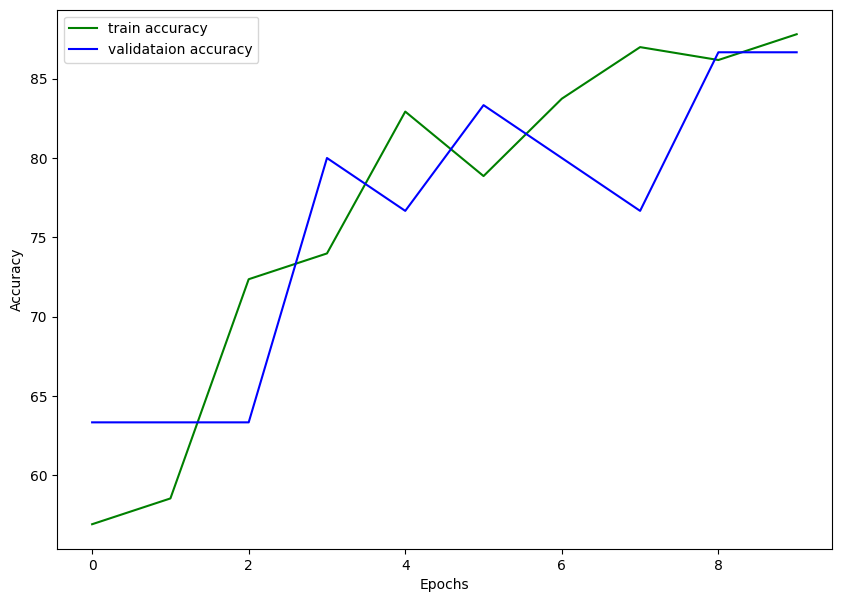

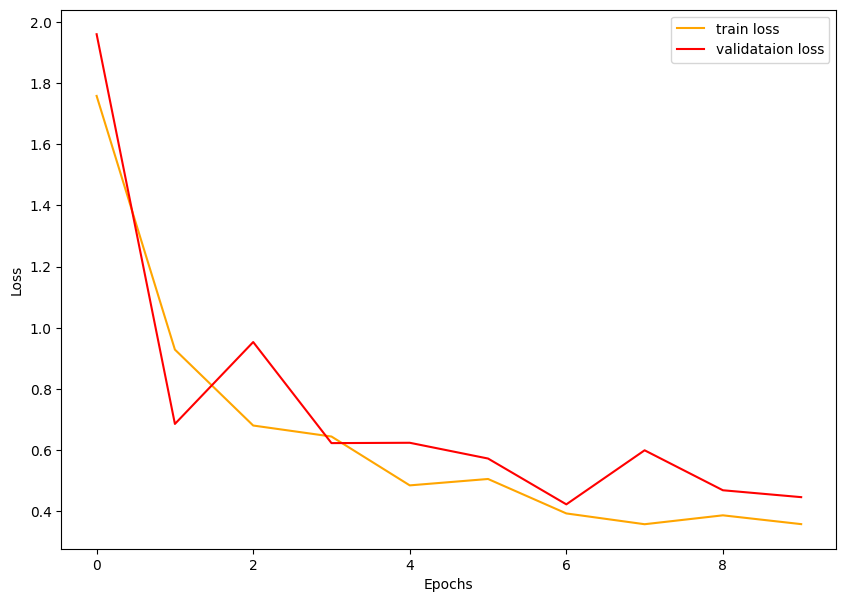

In [4]:
# save the trained model weights
save_model(num_epochs, model, optimizer, criterion)
# save the loss and accuracy plots
save_plots(train_acc, valid_acc, train_loss, valid_loss)
print('TRAINING COMPLETE')

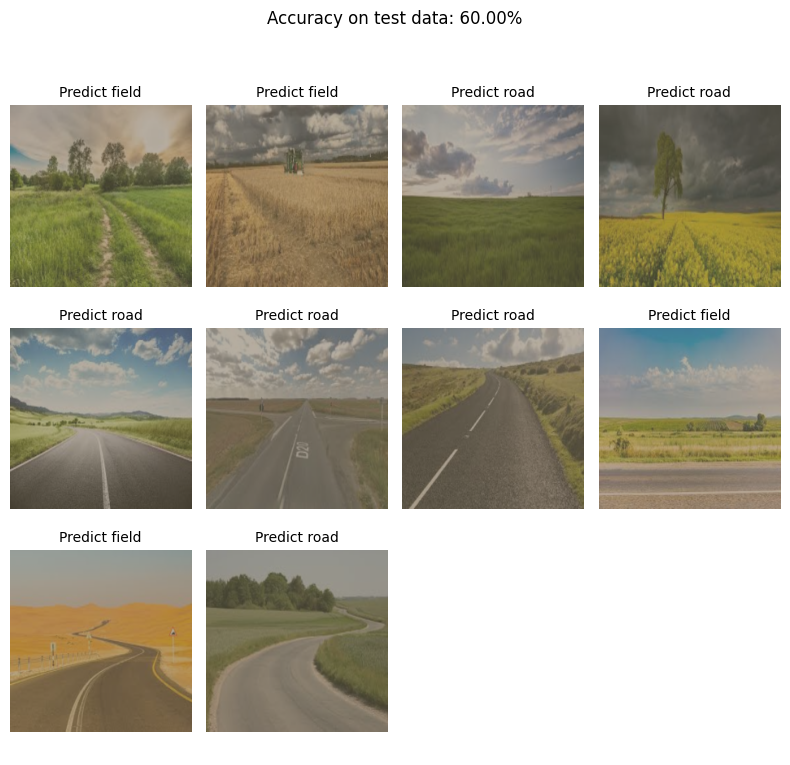

In [2]:
import os
import torch
import numpy
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from utils import visualize_test_predictions
from model import CNNModel


PATH_DATA = 'dataset/test_images'
                
device = ('cuda' if torch.cuda.is_available() else 'cpu')
# list containing all the class labels
labels = ['field', 'road']
# initialize the model and load the trained weights
model = CNNModel().to(device)
checkpoint = torch.load('output/model_baseline.pth', map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])


# define preprocess transforms
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )]
)

# import data
test_data = ImageFolder(
    root= PATH_DATA,
    transform= transform
)

# training data loaders
test_loader = DataLoader(test_data)

visualize_test_predictions(model, test_loader,labels)